In [1]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#nltk
import nltk
nltk.download('stopwords')

#preprocessing
from nltk.corpus import stopwords  #stopwords
from nltk import word_tokenize,sent_tokenize # tokenizing
from nltk.stem import PorterStemmer,LancasterStemmer  # using the Porter Stemmer and Lancaster Stemmer and others
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer  # lammatizer from WordNet

# for part-of-speech tagging
from nltk import pos_tag

# for named entity recognition (NER)
from nltk import ne_chunk

# vectorizers for creating the document-term-matrix (DTM)
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

# BeautifulSoup libraray
from bs4 import BeautifulSoup 

import re # regex

#model_selection
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#evaluation
from sklearn.metrics import accuracy_score,roc_auc_score 
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_confusion_matrix

#preprocessing scikit
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder

#classifiaction.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
 
#stop-words
stop_words=set(nltk.corpus.stopwords.words('english'))

#keras
import keras
from keras.preprocessing.text import one_hot,Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense , Flatten ,Embedding,Input,CuDNNLSTM,LSTM
from keras.models import Model
from keras.preprocessing.text import text_to_word_sequence

#gensim w2v
#word2vec
from gensim.models import Word2Vec

[nltk_data] Downloading package stopwords to /home/poj/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
2022-12-12 09:25:36.506322: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-12 09:25:36.590909: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-12 09:25:36.590923: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-12 09:25:37.108379: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load d

# Load the data

In [2]:
df = pd.read_csv("train_data.csv")
df.drop("Unnamed: 0", axis=1, inplace = True)
df.head()

,OriginalTweet,Extremely Negative,Extremely Positive,Negative,Neutral,Positive
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,0.0,0.0,0.0,1.0,0.0
1,advice Talk to your neighbours family to excha...,0.0,0.0,0.0,0.0,1.0
2,Coronavirus Australia: Woolworths to give elde...,0.0,0.0,0.0,0.0,1.0
3,My food stock is not the only one which is emp...,0.0,0.0,0.0,0.0,1.0
4,"Me, ready to go at supermarket during the #COV...",1.0,0.0,0.0,0.0,0.0


In [3]:
En = df[df['Extremely Negative'] == 1]
Ep = df[df['Extremely Positive'] == 1]
N = df[df['Negative'] == 1]
Ne = df[df['Neutral'] == 1]
P = df[df['Positive'] == 1]

print(len(En), len(Ep),len(N),len(Ne),len(P),)

5481 6625 9918 7711 11422


In [4]:
En = En[:5000]
Ep = Ep[:5000]
N = N[:5000]
Ne = Ne[:5000]
P = P[:5000]

# Preprocess

In [5]:
data = pd.concat([En, Ep, N, Ne, P])
data.head()

,OriginalTweet,Extremely Negative,Extremely Positive,Negative,Neutral,Positive
4,"Me, ready to go at supermarket during the #COV...",1.0,0.0,0.0,0.0,0.0
20,with 100 nations inficted with covid 19 th...,1.0,0.0,0.0,0.0,0.0
27,This morning I tested positive for Covid 19. I...,1.0,0.0,0.0,0.0,0.0
29,@7SealsOfTheEnd Soon with dwindling supplies u...,1.0,0.0,0.0,0.0,0.0
42,CHECK VIDEO ?? https://t.co/1ksn9Brl02 ??No fo...,1.0,0.0,0.0,0.0,0.0


In [6]:
# shuffling rows
data = data.sample(frac=1).reset_index(drop=True)
print(data.shape) 
data.head()

(25000, 6)


,OriginalTweet,Extremely Negative,Extremely Positive,Negative,Neutral,Positive
0,#Coronavirus: Asian woman dragged out of a sup...,0.0,0.0,0.0,0.0,1.0
1,Went to the grocery store and came home to spe...,0.0,0.0,0.0,1.0,0.0
2,6 key #consumer behavior threshold levels that...,0.0,0.0,0.0,0.0,1.0
3,With the #Coronavirus &amp; the #CDC guideline...,0.0,0.0,0.0,0.0,1.0
4,On behalf of all my peers in the supermarket i...,0.0,0.0,0.0,0.0,1.0


In [7]:
# function to clean and pre-process the text.
def clean_reviews(review):  
    
    # 1. Removing html tags
    review_text = BeautifulSoup(review,"lxml").get_text()
    
    # 2. Retaining only alphabets.
    review_text = re.sub("[^a-zA-Z]"," ",review_text)
    
    # 3. Converting to lower case and splitting
    word_tokens= review_text.lower().split()
    
    # 4. Remove stopwords
    le=WordNetLemmatizer()
    stop_words= set(stopwords.words("english"))     
    word_tokens= [le.lemmatize(w) for w in word_tokens if not w in stop_words]
    
    cleaned_review=" ".join(word_tokens)
    return cleaned_review


In [8]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
sentences=[]
sum=0
for review in data['OriginalTweet']:
    sents=tokenizer.tokenize(review.strip())
    sum+=len(sents)
    for sent in sents:
        cleaned_sent=clean_reviews(sent)
        sentences.append(cleaned_sent.split()) # can use word_tokenize also.
print(sum)
print(len(sentences))  # total no of sentences

[nltk_data] Downloading package punkt to /home/poj/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/poj/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/poj/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


58100
58100


In [9]:
import gensim
w2v_model=gensim.models.Word2Vec(sentences=sentences,vector_size=300,window=10,min_count=1)

In [10]:
w2v_model.train(sentences,epochs=10,total_examples=len(sentences))

(4435423, 5074230)

In [11]:
w2v_model.wv.get_vector('like')

array([-7.2102612e-01,  1.3880742e+00, -9.3839264e-01, -1.8524036e-01,
       -7.0749654e-04, -4.4565272e-01, -1.0296539e+00,  1.1755080e+00,
        3.0063948e-01,  9.4668508e-01, -1.2329451e+00, -6.3297433e-01,
        1.2171296e+00, -2.2613432e+00, -1.2560636e+00, -2.4049167e-02,
       -1.3478136e-01, -6.9278926e-01, -6.4293486e-01, -1.4939372e-02,
       -6.9085807e-01,  4.9455237e-01, -1.1607069e+00, -1.5537587e-01,
        1.2532537e+00,  7.6935776e-02, -1.3759880e+00,  1.9183478e+00,
       -1.9095920e-01,  2.0333050e-01, -2.5170761e-01,  1.1542524e-01,
       -7.1097958e-01,  4.4042104e-01, -3.5711750e-01, -4.9884811e-01,
        9.6443653e-02,  1.5001473e+00,  9.6783751e-01,  1.1409825e+00,
       -1.1091096e+00, -3.5918599e-01,  1.1125340e+00,  3.4643194e-01,
        6.3091409e-01,  1.0984976e-01,  5.9883744e-01,  1.5782026e+00,
       -6.4633042e-01,  1.1386195e+00, -3.4513858e-01,  2.3148993e-01,
        1.6372793e+00,  5.1611888e-01,  9.4261885e-02,  1.0894654e+00,
      

In [12]:
# total numberof extracted words.
vocab=w2v_model.wv.key_to_index
print("The total number of words are : ",len(vocab))

The total number of words are :  50751


In [13]:
w2v_model.wv.most_similar('king')

[('mejores', 0.9043143391609192),
 ('dougducey', 0.8937481045722961),
 ('sooper', 0.8910725116729736),
 ('faggot', 0.886925220489502),
 ('kellogg', 0.885707676410675),
 ('rickgladstone', 0.8813628554344177),
 ('ustedes', 0.8789780139923096),
 ('albert', 0.8783929944038391),
 ('wearethemu', 0.8773261308670044),
 ('riding', 0.8761908411979675)]

In [14]:
w2v_model.wv.similarity('good','like')

0.51607466

In [15]:
vocab=list(vocab.keys())


In [16]:
word_vec_dict={}
for word in vocab:
  word_vec_dict[word]=w2v_model.wv.get_vector(word)
print("The no of key-value pairs : ",len(word_vec_dict)) # should come equal to vocab size

The no of key-value pairs :  50751


In [17]:
data['clean_text']=data['OriginalTweet'].apply(clean_reviews)

In [18]:
maxi=-1
for i,rev in enumerate(data['clean_text']):
    tokens=rev.split()
    if(len(tokens)>maxi):
        maxi=len(tokens)
print(maxi)

50


In [19]:
tok = Tokenizer()
tok.fit_on_texts(data['clean_text'])
vocab_size = len(tok.word_index) + 1
encd_rev = tok.texts_to_sequences(data['clean_text'])

In [20]:


max_rev_len=1565  # max lenght of a review
vocab_size = len(tok.word_index) + 1  # total no of words
embed_dim=300 # embedding dimension as choosen in word2vec constructor



In [21]:
# now padding to have a amximum length of 1565
pad_rev= pad_sequences(encd_rev, maxlen=max_rev_len, padding='post')
pad_rev.shape   # note that we had 100K reviews and we have padded each review to have  a lenght of 1565 words.

(25000, 1565)

In [22]:
# now creating the embedding matrix
embed_matrix=np.zeros(shape=(vocab_size,embed_dim))
for word,i in tok.word_index.items():
  embed_vector=word_vec_dict.get(word)
  if embed_vector is not None:  # word is in the vocabulary learned by the w2v model
    embed_matrix[i]=embed_vector
  # if word is not found then embed_vector corressponding to that vector will stay zero.

In [23]:
# checking.
print(embed_matrix[14])

[-0.02750392  0.54612178 -0.16092816 -0.67771471  0.4198738  -0.60284567
 -1.21003509 -0.69855917  0.73795515  0.71069247 -0.69299793 -0.9165833
 -0.13159384  0.26842353  0.1751036  -0.95228893  1.3122561  -1.00626969
  1.40114915  0.42587125  0.39898035  0.52311689 -0.20614749 -1.11403
  0.88601553 -0.17997016 -0.89073187 -0.40507635  0.57425451 -1.05690444
 -0.98451596 -0.90757811  0.39620081  0.23485166  0.33714616 -0.80663007
  0.44412255  0.65748131 -0.38454556 -0.17153488 -1.34755456  0.17895578
  0.23003264  0.23455712 -0.05030574 -0.97384465  1.51802588 -0.59036309
  0.11366066 -0.15471418 -0.83221483  1.09006774  0.66225344  1.18781924
  0.03055411  0.55556804  1.0239464   0.44665956 -0.62596917 -0.10734163
  0.46336749  0.39424837 -1.36634302  0.29948881  0.98426598  0.41204244
 -0.31826544 -0.07141674 -0.32245269  1.27899563 -0.55263686 -1.02319431
  0.65954924 -0.98889363 -1.34595931  1.46814597 -0.96738416 -0.79384363
 -0.19660845 -0.21896066 -0.67328823 -0.49965021 -0.106

In [24]:
data.head()

,OriginalTweet,Extremely Negative,Extremely Positive,Negative,Neutral,Positive,clean_text
0,#Coronavirus: Asian woman dragged out of a sup...,0.0,0.0,0.0,0.0,1.0,coronavirus asian woman dragged supermarket gh...
1,Went to the grocery store and came home to spe...,0.0,0.0,0.0,1.0,0.0,went grocery store came home spend min wiping ...
2,6 key #consumer behavior threshold levels that...,0.0,0.0,0.0,0.0,1.0,key consumer behavior threshold level tie dire...
3,With the #Coronavirus &amp; the #CDC guideline...,0.0,0.0,0.0,0.0,1.0,coronavirus cdc guideline staysafestayhome get...
4,On behalf of all my peers in the supermarket i...,0.0,0.0,0.0,0.0,1.0,behalf peer supermarket industry providing aro...


In [25]:
Y = data.drop("OriginalTweet", axis = 1)
Y.drop("clean_text", axis=1, inplace = True)
Y.head()

,Extremely Negative,Extremely Positive,Negative,Neutral,Positive
0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0


In [26]:
# prepare train and val sets first
x_train,x_test,y_train,y_test=train_test_split(pad_rev,Y,test_size=0.20,random_state=42)

In [27]:
from keras.initializers import Constant
from keras.layers import ReLU
from keras.layers import Dropout
model=Sequential()
model.add(Embedding(input_dim=vocab_size,output_dim=embed_dim,input_length=max_rev_len,embeddings_initializer=Constant(embed_matrix)))
# model.add(CuDNNLSTM(64,return_sequences=False)) # loss stucks at about 
model.add(Flatten())
model.add(Dense(16,activation='relu'))
model.add(Dropout(0.50))
# model.add(Dense(16,activation='relu'))
# model.add(Dropout(0.20))
model.add(Dense(5,activation='softmax'))  # sigmod for bin. classification.

2022-12-12 09:26:17.190096: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-12-12 09:26:17.190118: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-12 09:26:17.190142: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (kardina): /proc/driver/nvidia/version does not exist
2022-12-12 09:26:17.190321: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1565, 300)         15225600  
                                                                 
 flatten (Flatten)           (None, 469500)            0         
                                                                 
 dense (Dense)               (None, 16)                7512016   
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 5)                 85        
                                                                 
Total params: 22,737,701
Trainable params: 22,737,701
Non-trainable params: 0
_________________________________________________________________


In [29]:
# compile the model
model.compile(optimizer=keras.optimizers.RMSprop(lr=1e-3),loss='binary_crossentropy',metrics=['accuracy'])

In [61]:
# specify batch size and epocj=hs for training.
epochs=20
batch_size=128

In [62]:
model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,validation_data=(x_test,y_test))

Epoch 1/20
157/157 [==============================] - 32s 202ms/step - loss: 0.4028 - accuracy: 0.4435 - val_loss: 0.3986 - val_accuracy: 0.4936
Epoch 2/20
157/157 [==============================] - 34s 215ms/step - loss: 0.3907 - accuracy: 0.4647 - val_loss: 0.3858 - val_accuracy: 0.5264
Epoch 3/20
157/157 [==============================] - 34s 214ms/step - loss: 0.3785 - accuracy: 0.4843 - val_loss: 0.3964 - val_accuracy: 0.4786
Epoch 4/20
157/157 [==============================] - 34s 215ms/step - loss: 0.3656 - accuracy: 0.5031 - val_loss: 0.3898 - val_accuracy: 0.5222
Epoch 5/20
157/157 [==============================] - 34s 216ms/step - loss: 0.3546 - accuracy: 0.5203 - val_loss: 0.3892 - val_accuracy: 0.5102
Epoch 6/20
157/157 [==============================] - 34s 215ms/step - loss: 0.3434 - accuracy: 0.5424 - val_loss: 0.3702 - val_accuracy: 0.5580
Epoch 7/20
157/157 [==============================] - 34s 215ms/step - loss: 0.3329 - accuracy: 0.5669 - val_loss: 0.3702 - val_ac

In [1]:
model.save("simple.keras")

NameError: name 'model' is not defined

In [40]:
import visualkeras



visualkeras.layered_view(model).show() # display using your system viewer
visualkeras.layered_view(model, to_file='output.png') # write to disk
visualkeras.layered_view(model, to_file='output.png').show() # write and show

visualkeras.layered_view(model)

TypeError: 'int' object is not iterable

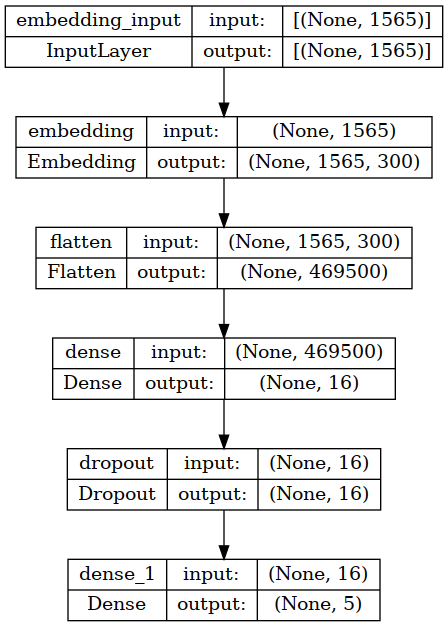

In [30]:
keras.utils.plot_model(model, to_file="img.png", show_shapes=True)

In [36]:
dnn=Sequential()
dnn.add(Embedding(input_dim=vocab_size,output_dim=embed_dim,input_length=max_rev_len,embeddings_initializer=Constant(embed_matrix)))
#dnn.add(CuDNNLSTM(64,return_sequences=False)) # loss stucks at about 
dnn.add(Flatten())
dnn.add(Dense(32,activation='relu'))
dnn.add(Dense(16,activation='relu'))
dnn.add(Dense(4,activation='relu'))
dnn.add(Dropout(0.20))
dnn.add(Dense(4,activation='relu'))
dnn.add(Dense(5,activation='softmax'))  # sigmod for bin. classification.

In [37]:
dnn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 1565, 300)         15225600  
                                                                 
 flatten_3 (Flatten)         (None, 469500)            0         
                                                                 
 dense_12 (Dense)            (None, 32)                15024032  
                                                                 
 dense_13 (Dense)            (None, 16)                528       
                                                                 
 dense_14 (Dense)            (None, 4)                 68        
                                                                 
 dropout_5 (Dropout)         (None, 4)                 0         
                                                                 
 dense_15 (Dense)            (None, 4)                

In [42]:
dnn.compile(optimizer=keras.optimizers.RMSprop(lr=1e-3),loss='binary_crossentropy',metrics=['accuracy'])

In [43]:
dnn.fit(x_train,y_train,epochs=10,batch_size=64,validation_data=(x_test,y_test))

Epoch 1/10
313/313 [==============================] - 65s 206ms/step - loss: 0.5518 - accuracy: 0.2245 - val_loss: 0.5000 - val_accuracy: 0.2342
Epoch 2/10
313/313 [==============================] - 66s 212ms/step - loss: 0.5005 - accuracy: 0.2842 - val_loss: 0.4802 - val_accuracy: 0.3362
Epoch 3/10
313/313 [==============================] - 68s 217ms/step - loss: 0.4817 - accuracy: 0.3295 - val_loss: 0.4676 - val_accuracy: 0.3346
Epoch 4/10
313/313 [==============================] - 62s 199ms/step - loss: 0.4645 - accuracy: 0.3349 - val_loss: 0.4557 - val_accuracy: 0.3522
Epoch 5/10
313/313 [==============================] - 61s 196ms/step - loss: 0.4442 - accuracy: 0.3484 - val_loss: 0.4396 - val_accuracy: 0.3594
Epoch 6/10
313/313 [==============================] - 62s 200ms/step - loss: 0.4230 - accuracy: 0.3868 - val_loss: 0.4442 - val_accuracy: 0.4086
Epoch 7/10
313/313 [==============================] - 61s 194ms/step - loss: 0.4042 - accuracy: 0.4463 - val_loss: 0.4296 - val_ac

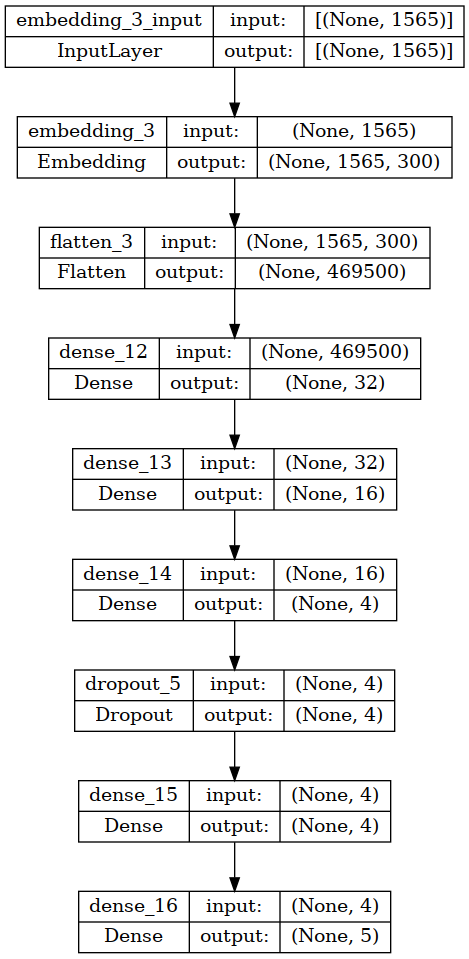

In [48]:
keras.utils.plot_model(dnn, to_file="dnn.png", show_shapes=True)

In [44]:
lstm=Sequential()
lstm.add(Embedding(input_dim=vocab_size,output_dim=embed_dim,input_length=max_rev_len,embeddings_initializer=Constant(embed_matrix)))
lstm.add(LSTM(units=150))
lstm.add(Dense(5,activation='softmax'))  # softmax for bin. classification.

In [45]:
lstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [46]:
print(lstm.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 1565, 300)         15225600  
                                                                 
 lstm (LSTM)                 (None, 150)               270600    
                                                                 
 dense_17 (Dense)            (None, 5)                 755       
                                                                 
Total params: 15,496,955
Trainable params: 15,496,955
Non-trainable params: 0
_________________________________________________________________
None


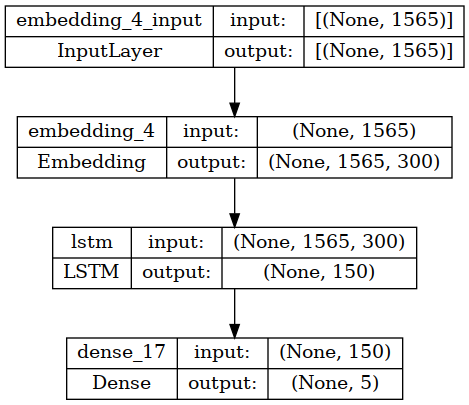

In [49]:
keras.utils.plot_model(lstm, to_file="dnn.png", show_shapes=True)

In [47]:
lstm.fit(x_train,y_train,epochs=10,batch_size=64,validation_data=(x_test,y_test))

Epoch 1/10
  7/313 [..............................] - ETA: 14:25 - loss: 1.6099 - accuracy: 0.1987

KeyboardInterrupt: 